In [1]:
import pandas as pd
import random
import string
from faker import Faker

# Create a Faker instance
fake = Faker()

# Define the number of rows you want in your dataset
user_num_rows = 1000  # You can change this number as needed

# Generate random data
data = {
    'userId': list(range(1, user_num_rows + 1)),
    'userName': [fake.name() for _ in range(user_num_rows)],
    'age': [random.randint(18, 65) for _ in range(user_num_rows)],
    'gender': [random.choice(['M', 'F']) for _ in range(user_num_rows)],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('random_user_data.csv', index=False)

In [2]:
# Define the number of rows you want in your dataset
service_num_rows = 1500  # You can change this number as needed

# Generate random data for the "service" table
data = {
    'serviceId': list(range(1, service_num_rows + 1)),
    'serviceName': [fake.word().capitalize() for _ in range(service_num_rows)],
}

# Create a DataFrame for the "service" table
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('random_service_data.csv', index=False)

In [3]:
# Define the number of rows you want in your "ratings" dataset
ratings_num_rows = 100000  # You can change this number as needed

# Create a DataFrame for the "ratings" table
ratings_data = {
    'userId': [random.randint(1, user_num_rows) for _ in range(ratings_num_rows)],
    'serviceId': [random.randint(1, service_num_rows) for _ in range(ratings_num_rows)],
    'rating': [random.randint(1, 5) for _ in range(ratings_num_rows)],
}

ratings_df = pd.DataFrame(ratings_data)

# Save the DataFrame to a CSV file
ratings_df.to_csv('random_ratings_data.csv', index=False)

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds # for sparse matrices

In [5]:
# Read the user data CSV file into a DataFrame
user_df = pd.read_csv('random_user_data.csv')

# Read the service data CSV file into a DataFrame
service_df = pd.read_csv('random_service_data.csv')

# Read the ratings data CSV file into a DataFrame
df = pd.read_csv('random_ratings_data.csv')

In [6]:
df = df.drop_duplicates(['userId', 'serviceId'], keep='first')
ratings_df = df.merge(user_df[['userId', 'userName', 'gender', 'age']], on='userId', how='left')

In [7]:
rows, columns = ratings_df.shape
print("No of rows = ", rows)
print("No of columns = ", columns)

No of rows =  96776
No of columns =  6


In [8]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96776 entries, 0 to 96775
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     96776 non-null  int64 
 1   serviceId  96776 non-null  int64 
 2   rating     96776 non-null  int64 
 3   userName   96776 non-null  object
 4   gender     96776 non-null  object
 5   age        96776 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 5.2+ MB


In [9]:
# Find number of missing values in each column
ratings_df.isna().sum()

userId       0
serviceId    0
rating       0
userName     0
gender       0
age          0
dtype: int64

In [10]:
# Summary statistics of 'rating' variable
ratings_df['rating'].describe()

count    96776.000000
mean         2.995908
std          1.411728
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

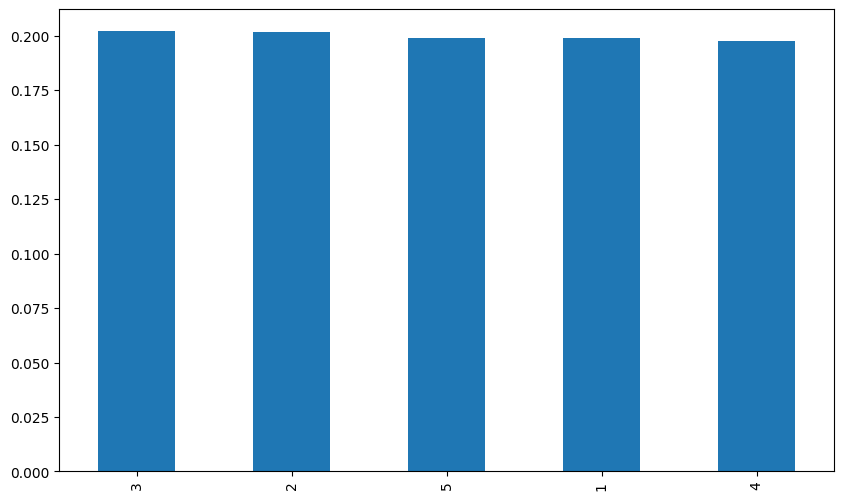

In [11]:
#Create the plot and provide observations
plt.figure(figsize = (10,6))
ratings_df['rating'].value_counts(1).plot(kind='bar')
plt.show()

In [12]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', ratings_df['userId'].nunique())
print('Number of unique ITEMS in Raw data = ', ratings_df['serviceId'].nunique())

Number of unique USERS in Raw data =  1000
Number of unique ITEMS in Raw data =  1500


In [13]:
# Top 10 users based on rating
most_rated = ratings_df.groupby('userId').size().sort_values(ascending=False)[:10]
most_rated

userId
79     138
624    132
938    130
56     127
789    126
523    122
785    122
455    122
192    120
38     120
dtype: int64

In [14]:
counts = ratings_df['userId'].value_counts()
df_final = ratings_df[ratings_df['userId'].isin(counts[counts >= 50].index)]    

In [15]:
print('The number of observations in the final data =', len(ratings_df))
print('Number of unique USERS in the final data = ', ratings_df['userId'].nunique())
print('Number of unique PRODUCTS in the final data = ', ratings_df['serviceId'].nunique())

The number of observations in the final data = 96776
Number of unique USERS in the final data =  1000
Number of unique PRODUCTS in the final data =  1500


In [16]:

#Creating the interaction matrix of products and users based on ratings and replacing NaN value with 0
final_ratings_matrix = ratings_df.pivot(index = 'userId', columns ='serviceId', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

#Finding the number of non-zero entries in the interaction matrix 
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

#Finding the possible number of ratings as per the number of users and products
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

#Density of ratings
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

Shape of final_ratings_matrix:  (1000, 1500)
given_num_of_ratings =  96776
possible_num_of_ratings =  1500000
density: 6.45%


serviceId,1,2,3,4,5,6,7,8,9,10,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:

#Rank Based Recommendation System

#Calculate the average rating for each product 
average_rating = df_final.groupby('serviceId').mean()['rating']

#Calculate the count of ratings for each product
count_rating = df_final.groupby('serviceId').count()['rating']

#Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

#Sort the dataframe by average of ratings
final_rating = final_rating.sort_values(by='avg_rating',ascending=False)

final_rating.head()
     


,avg_rating,rating_count
serviceId,,
236,3.549296,71
955,3.541667,48
553,3.485714,70
1107,3.484375,64
715,3.480000,50


In [18]:
#defining a function to get the top n products based on highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):
    
    #Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count']>min_interaction]
    
    #Sorting values w.r.t average rating 
    recommendations = recommendations.sort_values('avg_rating',ascending=False)
    
    return recommendations.index[:n]

In [19]:
#Recommending top 5 products with 50 minimum interactions based on popularity
list(top_n_products(final_rating, 5, 10))

[236, 955, 553, 1107, 715]

In [20]:
#Recommending top 5 products with 100 minimum interactions based on popularity
list(top_n_products(final_rating, 5, 50))    

[236, 553, 1107, 189, 863]

In [21]:
#Collaborative Filtering based Recommendation System
#User based collaborative filtering
final_ratings_matrix.head()

serviceId,1,2,3,4,5,6,7,8,9,10,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()

serviceId,1,2,3,4,5,6,7,8,9,10,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# defining a function to get similar users
def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]): #  .shape[0] gives number of rows
        
        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])
        
        #Appending the user and the corresponding similarity score with user_id as a tuple
        similarity.append((user,sim))
        
    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity] #Extract the user from each tuple in the sorted list
    similarity_score = [tup[1] for tup in similarity] ##Extracting the similarity score from each tuple in the sorted list
   
    #Remove the original user and its similarity score and keep only other similar users 
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score

In [24]:
similar = similar_users(123,final_ratings_matrix)[0][0:10]
similar

[625, 807, 435, 704, 533, 135, 942, 816, 304, 103]

In [25]:
#Print the similarity score
similar_users(25,final_ratings_matrix)[1][0:10]

[array([[0.12799573]]),
 array([[0.12506328]]),
 array([[0.1217671]]),
 array([[0.12109767]]),
 array([[0.12102808]]),
 array([[0.11620606]]),
 array([[0.115592]]),
 array([[0.11503387]]),
 array([[0.11376595]]),
 array([[0.11339635]])]

In [26]:
#Finding out top 10 similar users to the user index 1521 and their similarity score
similar = similar_users(98, final_ratings_matrix)[0][0:10]
similar

[157, 566, 145, 504, 393, 221, 534, 879, 258, 711]

In [27]:
#Print the similarity score
similar_users(98,final_ratings_matrix)[1][0:10]

[array([[0.15607677]]),
 array([[0.14765064]]),
 array([[0.13782919]]),
 array([[0.13104231]]),
 array([[0.13088186]]),
 array([[0.12343054]]),
 array([[0.1201222]]),
 array([[0.11859638]]),
 array([[0.11542898]]),
 array([[0.11509222]])]

In [28]:
# defining the recommendations function to get recommendations by using the similar users' preferences
def recommendations(user_index, num_of_products, interactions_matrix):
    
    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(user_index, interactions_matrix)[0]
    #print(interactions_matrix.loc[user_index])
    #Finding product IDs with which the user_id has interacted
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []
    
    observed_interactions = prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:
            
            #Finding 'n' products which have been rated by similar users but not by the user_id
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break
    
    return recommendations[:num_of_products]

In [29]:
#Recommend 5 products to user index 3 based on similarity based collaborative filtering

recommendations(123,5,final_ratings_matrix)

[512, 5, 1038, 1040, 24]

In [30]:

#Model based Collaborative Filtering: Singular Value Decomposition

#We have seen above that the interaction matrix is highly sparse. SVD is best to apply on a large sparse matrix. Note that for sparse matrices, we can use the sparse.linalg.svds() function to perform the decomposition

#Also, we will use k=50 latent features to predict rating of products


In [31]:
#CSR matrix
from scipy.sparse import csr_matrix
final_ratings_sparse = csr_matrix(final_ratings_matrix.values)

In [32]:
# Singular Value Decomposition
U, s, Vt = svds(final_ratings_sparse, k = 50) # here k is the number of latent features

# Construct diagonal array in SVD
sigma = np.diag(s)

In [33]:
U.shape

(1000, 50)

In [34]:
sigma.shape 

(50, 50)

In [35]:
Vt.shape

(50, 1500)

In [36]:

#Predicting ratings

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(abs(all_user_predicted_ratings), columns = final_ratings_matrix.columns)
preds_df.head()
preds_matrix = csr_matrix(preds_df.values)
     


In [37]:

#Function to recommend products


import numpy as np

def recommend_items(user_index, interactions_matrix, preds_matrix, num_recommendations):
    
    # Get the user's ratings from the actual and predicted interaction matrices
    user_ratings = interactions_matrix[user_index,:].toarray().reshape(-1)
    user_predictions = preds_matrix[user_index,:].toarray().reshape(-1)

    #Creating a dataframe with actual and predicted ratings columns
    temp = pd.DataFrame({'user_ratings': user_ratings, 'user_predictions': user_predictions})
    temp['Recommended Products'] = np.arange(len(user_ratings))
    temp = temp.set_index('Recommended Products')
    
    #Filtering the dataframe where actual ratings are 0 which implies that the user has not interacted with that product
    temp = temp.loc[temp.user_ratings == 0]   
    
    #Recommending products with top predicted ratings
    temp = temp.sort_values('user_predictions',ascending=False)#Sort the dataframe by user_predictions in descending order
    print('\nBelow are the recommended products for user(user_id = {}):\n'.format(user_index))
    print(temp['user_predictions'].head(num_recommendations))
     


In [39]:
#Enter 'user index' and 'num_recommendations' for the user
recommend_items(123,final_ratings_sparse,preds_matrix,5)


Below are the recommended products for user(user_id = 123):

Recommended Products
1286    1.272602
1376    1.223969
96      1.142220
1108    1.126696
1324    1.112949
Name: user_predictions, dtype: float64


In [40]:
recommend_items(123,final_ratings_sparse,preds_matrix,10)


Below are the recommended products for user(user_id = 123):

Recommended Products
1286    1.272602
1376    1.223969
96      1.142220
1108    1.126696
1324    1.112949
655     1.033569
1440    1.031887
386     1.030144
784     1.009372
810     0.969594
Name: user_predictions, dtype: float64


In [41]:
recommend_items(12,final_ratings_sparse,preds_matrix,10)


Below are the recommended products for user(user_id = 12):

Recommended Products
825     1.480813
145     1.198050
903     1.147354
1113    1.145987
1343    1.113115
1399    1.101878
1416    1.090829
421     1.085309
399     1.081591
612     1.075387
Name: user_predictions, dtype: float64


In [42]:

#Evaluating the model

final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()
     


serviceId,1,2,3,4,5,6,7,8,9,10,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
average_rating = final_ratings_matrix.mean()
average_rating.head()

serviceId
1    0.203
2    0.167
3    0.226
4    0.211
5    0.195
dtype: float64

In [44]:
preds_df.head()    

serviceId,1,2,3,4,5,6,7,8,9,10,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
0,0.066186,0.501082,0.106434,0.387281,0.206460,0.184117,0.044614,0.031259,0.602823,0.182536,...,0.103307,0.236346,0.355698,0.025776,0.027800,0.172414,0.541968,0.253276,0.489101,0.266730
1,0.151626,0.609755,0.675370,0.056588,0.069994,0.360042,0.084457,0.279376,0.204324,0.643626,...,0.419495,0.003027,0.269825,0.196302,0.150870,0.247140,0.095432,0.042781,0.155351,0.711612
2,0.069318,0.767143,0.123201,0.197655,0.229882,0.181230,0.066786,0.150122,0.158512,0.414533,...,0.469345,0.345671,0.036177,0.570474,0.160779,0.898893,0.152431,0.092556,0.197536,0.046847
3,0.133580,0.222468,0.006753,0.853692,0.130088,0.021801,0.026427,0.142496,0.489739,0.144559,...,0.116506,0.378435,0.508428,0.592655,0.127506,0.210555,0.175457,0.138125,0.349849,0.360099
4,0.002865,0.182194,0.302095,0.095476,0.542426,0.454214,1.170363,0.063517,0.214907,0.190927,...,0.440902,0.117287,0.395839,0.278180,0.242735,0.625577,0.577266,0.012593,0.022279,0.092064


In [45]:
avg_preds=preds_df.mean()
avg_preds.head()

serviceId
1    0.313223
2    0.254352
3    0.359876
4    0.335993
5    0.280981
dtype: float64

In [46]:
rmse_df = pd.concat([average_rating, avg_preds], axis=1)

rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']

rmse_df.head()

,Avg_actual_ratings,Avg_predicted_ratings
serviceId,,
1,0.203,0.313223
2,0.167,0.254352
3,0.226,0.359876
4,0.211,0.335993
5,0.195,0.280981


In [47]:
RMSE=mean_squared_error(rmse_df['Avg_actual_ratings'], rmse_df['Avg_predicted_ratings'], squared=False)
print(f'RMSE SVD Model = {RMSE} \n') 

RMSE SVD Model = 0.09223754640204469 

